<a href="https://colab.research.google.com/github/anhphuong012/ML-2023/blob/main/Lab_3_20130371_NguyenNgocPhuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deadline: 23:59, 04/03/2023**

# Task 1. 
The main aim of this task is to get familiar with the tasks of preprocessing data using Scikit-learn – a Python-based Machine Learning framework and Linear Regression.


For given 2 datasets (preprocessing_weather.csv, preprocessing_salary_dummy.csv), 
*   Identify issues with these datasets
*   Then, apply preprocessing techniques to the datasets


#Task 1.1. Dataset preprocessing_weather.csv

**Issues**:


1.   Cột temperature và cột humidity có dòng thiếu dữ liệu.
2.   Cột outlook và windy đang ở dạng rời rạc.
....



**Preprocessing dataset**:

In [3]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/lab'

Mounted at /content/gdrive
/content/gdrive/MyDrive/lab


In [4]:
#import thư viện
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('preprocessing_weather.csv')

imputer = SimpleImputer(missing_values=np.nan,strategy="median")
data


,id,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,NaN,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,NaN,False,yes
9,10,rainy,75,80,False,yes


In [ ]:

data[['temperature','humidity']] = imputer.fit_transform(data[['temperature','humidity']])
data

,id,outlook,temperature,humidity,windy,play
0,1,sunny,85.0,85.0,False,no
1,2,sunny,80.0,90.0,True,no
2,3,overcast,83.0,86.0,False,yes
3,4,rainy,72.0,96.0,False,yes
4,5,rainy,68.0,80.0,False,yes
5,6,rainy,65.0,70.0,True,no
6,7,overcast,64.0,65.0,True,yes
7,8,sunny,72.0,95.0,False,no
8,9,sunny,69.0,85.0,False,yes
9,10,rainy,75.0,80.0,False,yes


#Task 1.2. Dataset preprocessing_salary_dummy.csv

**Issues**:


1.   Dữ liệu ở cột  Age và cột Salary có dòng thiếu dữ liệu.
2.   Dữ liệu ở cột Country và Purchased đang ở dạng rời rạc.
....



**Preprocessing dataset**:

In [ ]:
#code
data_salary = pd.read_csv('preprocessing_salary_dummy.csv')
data_salary



,No,Country,Age,Salary,Purchased
0,1,France,44.0,72000.0,No
1,2,Spain,27.0,48000.0,Yes
2,3,Germany,30.0,54000.0,No
3,4,Spain,38.0,61000.0,No
4,5,Germany,40.0,NaN,Yes
5,6,France,35.0,58000.0,Yes
6,7,Spain,NaN,52000.0,No
7,8,France,48.0,79000.0,Yes
8,9,Germany,50.0,83000.0,No
9,10,France,37.0,67000.0,Yes


In [ ]:
data_salary[[' Age','   Salary ']] = imputer.fit_transform(data_salary[[' Age','   Salary ']])
data_salary

,No,Country,Age,Salary,Purchased
0,1,France,44.0,72000.0,No
1,2,Spain,27.0,48000.0,Yes
2,3,Germany,30.0,54000.0,No
3,4,Spain,38.0,61000.0,No
4,5,Germany,40.0,61000.0,Yes
5,6,France,35.0,58000.0,Yes
6,7,Spain,38.0,52000.0,No
7,8,France,48.0,79000.0,Yes
8,9,Germany,50.0,83000.0,No
9,10,France,37.0,67000.0,Yes


In [ ]:
dummies = pd.get_dummies(data_salary['   Country'])

merged = pd.concat([data_salary, dummies], axis='columns')
merged.drop(['   Country'], axis='columns')
merged

,No,Country,Age,Salary,Purchased,France,Germany,Spain
0,1,France,44.0,72000.0,No,1,0,0
1,2,Spain,27.0,48000.0,Yes,0,0,1
2,3,Germany,30.0,54000.0,No,0,1,0
3,4,Spain,38.0,61000.0,No,0,0,1
4,5,Germany,40.0,61000.0,Yes,0,1,0
5,6,France,35.0,58000.0,Yes,1,0,0
6,7,Spain,38.0,52000.0,No,0,0,1
7,8,France,48.0,79000.0,Yes,1,0,0
8,9,Germany,50.0,83000.0,No,0,1,0
9,10,France,37.0,67000.0,Yes,1,0,0


# **Task 2**. Simple Linear Regression in Scikit-Learn
---
# **Usage:**
> **Step 1**: build a model
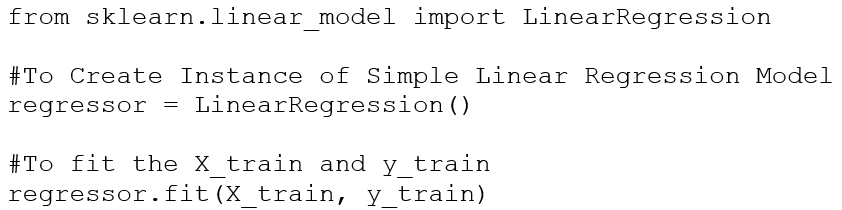

> **Step 2**: test the model

*   With test set:
`y_pred = regressor.predict(X_test)`

*   With a single value ("predict" method always expects a 2D array as the format of its inputs)
`regressor.predict([[12]])`

> **Step 3**: 
*   get w0, w1 , w2, …,
-- W0: `regressor.intercept_`
-- w1, w2, …: `regressor.coef_`
*   R^2 score: sum of squared r(i)
`r(i) = y(i) - f(x(i))`: residual of ith instance


> **Metrics**:
*   metrics.explained_variance_score(y_test, y_pred)
*   metrics.mean_absolute_error(y_ test, y_pred) 
*   metrics.mean_squared_error(y_ test, y_pred[, ...])
*   metrics.mean_squared_log_error(y_ test, y_pred)
*   metrics.median_absolute_error(y_ test, y_pred)
*   metrics.r2_score(y_ test, y_pred[, ...])




---



# Tasks
The main aim of these tasks is to get familiar with Linear Regression problems. Apply LinearRegression to the following datasets. Note the error obtained and coefficients
*   **dataset1.csv** - a synthetic dataset including 5 points (1-dimensional data) with one target
*   **dataset2.csv** - a synthetic dataset including 1000 points (3-dimensional data) with one target variable. The variables are named x1, x2, x3, y. y is the variable to be regressed. Split the dataset into training set and test set (70% for training set and 30% for test set). 


# Task 2.1. dataset1.csv


In [ ]:
#code

dataset1 = pd.read_csv('dataset1.csv')
X_train = dataset1[['x']]
Y_train = dataset1[['y']]




print(X_train)
print(Y_train)

   x
0  1
1  2
2  4
3  3
4  5
   y
0  1
1  3
2  3
3  2
4  5


**Khai báo Regression**

In [18]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train,Y_train)
print(regression.intercept_)
print(regression.coef_)

[0.4]
[[0.8]]


In [ ]:
y_red = regression.predict(X_train)
y_red

array([[1.2],
       [2. ],
       [3.6],
       [2.8],
       [4.4]])

In [ ]:
r2 = metrics.r2_score(Y_train,y_red)
r2

0.7272727272727273

# Task 2.2. dataset2.csv


In [ ]:
#code

dataset2 = pd.read_csv('dataset2.csv')
dataset2

,id,x1,x2,x3,y
0,1,2.41710,0.83595,0.72469,18.21900
1,2,1.98150,-1.01800,-1.06400,0.55271
2,3,1.82850,0.49281,-0.89035,7.00510
3,4,1.50480,-1.74070,-1.72290,-7.06310
4,5,0.27489,-0.31811,-0.56168,0.74380
...,...,...,...,...,...
594,595,1.64550,0.63758,-0.75519,7.71100
595,596,-1.16320,0.17321,-2.23150,-9.95440
596,597,-1.61920,-0.57279,-2.26420,-14.47000
597,598,-0.34407,1.86730,-2.22070,-0.66676


In [ ]:
X = dataset2[['x1','x2','x3']]
Y = dataset2[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


regression.fit(X_train,y_train)
print(regression.intercept_)
print(regression.coef_)




[4.00002045]
[[2.99999593 3.99999565 4.99999157]]


In [ ]:
y_red = regression.predict(X_test)
y_red

array([[ -1.09555994],
       [  2.82102377],
       [ -2.80936993],
       [  0.93248117],
       [  4.46717086],
       [ 18.10287795],
       [-17.89014708],
       [  9.33476505],
       [  4.21722312],
       [ 23.10459471],
       [  7.45104576],
       [  8.46791969],
       [ 18.21855087],
       [ -4.17904845],
       [  6.84075558],
       [  2.95236441],
       [  8.85771178],
       [ -0.74379807],
       [ 15.01121128],
       [ 10.95829928],
       [-18.12084873],
       [ -4.44901703],
       [ -0.80967441],
       [ 22.74599616],
       [-13.42213273],
       [ 18.65213653],
       [  9.02682149],
       [ -4.48154008],
       [ 10.20840546],
       [ 14.95625205],
       [  6.46187466],
       [ 12.21761409],
       [  0.73404084],
       [  8.62311054],
       [ -4.17021826],
       [-12.78145809],
       [ 15.66639598],
       [ 20.62850697],
       [ -0.5914231 ],
       [ -5.31117543],
       [ 10.51841256],
       [ -5.39886303],
       [  3.65506371],
       [  0

In [ ]:
r2 = metrics.r2_score(y_test,y_red)
r2

0.9999999994479442

# Task 2.3. Apply LinearRegression to the following dataset:
*   Red wine quality: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv . The dataset includes info about the chemical properties of different types of wine and how they relate to overall quality. 



In [13]:
#code
data3 = pd.read_csv('winequality-red.csv',sep=";")
print(data3.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [9]:
data3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
X = data3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = data3[['quality']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

regression.fit(X_train,Y_train)
print(regression.intercept_)
print(regression.coef_)

[40.44622602]
[[ 4.79622779e-02 -1.11840142e+00 -2.76227524e-01  2.04756941e-02
  -1.76890728e+00  5.34980397e-03 -3.44870744e-03 -3.67102234e+01
  -3.47701478e-01  9.29729469e-01  2.66278221e-01]]


In [20]:
y_pred = regression.predict(X_test)
y_pred

array([[5.53665503],
       [5.3757028 ],
       [6.09994909],
       [5.7271783 ],
       [6.68879378],
       [5.97168959],
       [6.19501591],
       [5.0949962 ],
       [5.78560446],
       [5.16051207],
       [6.18938201],
       [5.3458751 ],
       [5.56153145],
       [6.48086642],
       [5.62134947],
       [5.34994932],
       [5.96750537],
       [5.42356559],
       [5.60694483],
       [5.41711492],
       [5.73487774],
       [6.17637761],
       [5.37367225],
       [6.41905085],
       [5.44448873],
       [6.30767106],
       [6.09458407],
       [5.68011379],
       [5.30702362],
       [5.83089423],
       [5.26785033],
       [6.38597599],
       [5.21408686],
       [6.30405167],
       [4.93102342],
       [5.71810813],
       [5.28395579],
       [5.36258835],
       [6.36476545],
       [5.06531698],
       [6.06709542],
       [5.05867037],
       [5.20044998],
       [6.14658841],
       [5.12300708],
       [5.7678295 ],
       [5.10673949],
       [5.257

In [21]:
r2 = metrics.r2_score( Y_test,y_pred)
r2

0.326640272698682

# Task 2.4. Apply LinearRegression to the following dataset:
*   Energy efficiency: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency.




In [ ]:
#code
data = pd.read_excel('Task4_ENB2012_data.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
X = data[['X1','X2','X3','X4','X5','X6','X7','X8']]
Y1 = data[['Y1']]
X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size = 0.2, random_state = 1)
regression.fit(X_train,y1_train)
print(regression.intercept_)
print(regression.coef_)

[81.37904986]
[[-6.37286002e+01 -8.12517595e+10  8.12517595e+10  1.62503519e+11
   4.26279306e+00  1.18149278e-02  1.97247945e+01  2.46060353e-01]]


In [ ]:
y1_pred = regression.predict(X_test)
y1_pred

array([[13.30267658],
       [27.46864625],
       [33.38608461],
       [32.657738  ],
       [34.13608059],
       [15.36289548],
       [12.41599123],
       [28.27498828],
       [15.0131211 ],
       [26.281372  ],
       [17.91533126],
       [30.42736543],
       [31.87261113],
       [17.20078006],
       [12.97653206],
       [32.69318278],
       [27.26986345],
       [17.70471569],
       [15.78108998],
       [33.86708375],
       [32.11867149],
       [ 8.56843116],
       [28.69146146],
       [18.11099909],
       [13.73587353],
       [33.62033003],
       [18.47011895],
       [13.06843116],
       [35.86251753],
       [16.02099237],
       [30.98764711],
       [33.14002425],
       [11.2833417 ],
       [16.64980244],
       [27.00773813],
       [36.12039281],
       [18.56767501],
       [11.02546642],
       [32.93924314],
       [15.03675096],
       [36.60337243],
       [12.00970783],
       [10.12352522],
       [12.19356073],
       [10.4744888 ],
       [11

In [ ]:
r2 = metrics.r2_score(y1_test,y1_pred)
r2

0.8983987508850517

In [ ]:
X = data[['X1','X2','X3','X4','X5','X6','X7','X8']]
Y2 = data[['Y2']]
X_train, X_test, y2_train, y2_test = train_test_split(X, Y1, test_size = 0.2, random_state = 1)
regression.fit(X_train,y1_train)
print(regression.intercept_)
print(regression.coef_)

[81.37904986]
[[-6.37286002e+01 -8.12517595e+10  8.12517595e+10  1.62503519e+11
   4.26279306e+00  1.18149278e-02  1.97247945e+01  2.46060353e-01]]


In [ ]:
y2_pred = regression.predict(X_test)
y2_pred

array([[13.30267658],
       [27.46864625],
       [33.38608461],
       [32.657738  ],
       [34.13608059],
       [15.36289548],
       [12.41599123],
       [28.27498828],
       [15.0131211 ],
       [26.281372  ],
       [17.91533126],
       [30.42736543],
       [31.87261113],
       [17.20078006],
       [12.97653206],
       [32.69318278],
       [27.26986345],
       [17.70471569],
       [15.78108998],
       [33.86708375],
       [32.11867149],
       [ 8.56843116],
       [28.69146146],
       [18.11099909],
       [13.73587353],
       [33.62033003],
       [18.47011895],
       [13.06843116],
       [35.86251753],
       [16.02099237],
       [30.98764711],
       [33.14002425],
       [11.2833417 ],
       [16.64980244],
       [27.00773813],
       [36.12039281],
       [18.56767501],
       [11.02546642],
       [32.93924314],
       [15.03675096],
       [36.60337243],
       [12.00970783],
       [10.12352522],
       [12.19356073],
       [10.4744888 ],
       [11

In [ ]:
r2 = metrics.r2_score(y2_test,y2_pred)
r2

0.8983987508850517

# Finally,
Save a copy in your Github. Remember renaming the notebook.